In [1]:
import networkx as nx
import numpy as np
from collections import deque

In [2]:
# This class is going to represent a graph, so that we can organize all the implementation and methods of
# our data structure in an organized way
class Graph:
    
    # This constructur takes as parameter the number of nodes
    def __init__(self, size):
        self._nodes = [[] for _ in range(size)]
        self._nodes_features = [{} for _ in range(size)]
        
    # This method adds features to a node in the form of a dictionary
    def add_features_to_node(self, node, features, replace = False):
        if(replace):
            self._nodes_features[node - 1] = features
        else:
            for key in features.keys():
                self._nodes_features[node - 1][key] = features[key]
                
    # This method is for removing all given features from the nodes of the graph, or all features if no second
    # parameter is given
    def reset_features(self, features = None):
        if(features is None):
            for index in range(len(self._nodes_features)):
                self._nodes_features[index] = {}
        else:
            for index in range(len(self._nodes_features)):
                for feature in features:
                    self._nodes_features[index].pop(feature, None)
        
    # This method is for getting features of a node
    def get_feature_of_node(self, node, feature):
        moment = self._nodes_features[node - 1]
        if(feature in moment.keys()):
            return(moment[feature])
        return(None)
        
    # This method adds an edge to the graph, together with an optional dict of weights
    # The edge is given as a tuple of nodes
    def add_edge(self, edge, weights = None):
        to_add = (edge[1] - 1, {})
        if(not weights is None):
            to_add = (edge[1] - 1, weights)
        self._nodes[edge[0] - 1].append(to_add)
        
        to_add = (edge[0] - 1, {})
        if(not weights is None):
            to_add = (edge[0] - 1, weights)
        self._nodes[edge[1] - 1].append(to_add)
        
    # This method gets all neighbours of a node and given weights of the edges connecting them to the node
    def get_neighbours(self, node, features = None):
        if(features is None):
            return([single_node[0] + 1 for single_node in self._nodes[node - 1]])
        to_return = []
        for neighbour in self._nodes[node - 1]:
            to_return.append((neighbour[0] + 1, dict((k, neighbour[1][k]) for k in features if k in neighbour[1])))
        return(to_return)
    
    # This method get an edge from the graph together with the specified weights
    # If the edge doesn't exist it returns None
    def get_edge(self, node_one, node_two, features = None):
        for neighbour in self._nodes[node_one - 1]:
            if(neighbour[0] == node_two - 1):
                if(features is None):
                    return((node_one, node_two))
                return((node_one, node_two, dict((k, neighbour[1][k]) for k in features if k in neighbour[1])))
        return(None)
    
    # This method updates and edge adding more weights or replacing them (based on replace parameter)
    # It doesn't do anything if the edge doesn't exist
    def update_edge(self, node_one, node_two, weights):
        for neighbour in self._nodes[node_one - 1]:
            if(neighbour[0] == node_two - 1):
                for key in weights.keys():
                    neighbour[1][key] = weights[key]
                return
            
    # This method prints the adjacency list of the graph, it will be used just to check that everything works fine
    def print_graph(self, head = None):
        if(head is None):
            head = len(self._nodes)
        for index in range(head):
            print(index + 1, end = " : ")
            print([(node[0] + 1, node[1]) for node in self._nodes[index]])

In [3]:
counter = 0
nodes = open("Desktop/adm_hw5/USA-road-d.CAL.co" , "r")
while(True):
    string = nodes.readline()
    if(string == ""):
        break
    if(string[0] == 'v'):
        counter = counter + 1
nodes.close()
print(counter)

1890815


In [4]:
CAL = Graph(counter)

In [5]:
times = open("Desktop/adm_hw5/USA-road-t.CAL.gr", "r")
distances = open("Desktop/adm_hw5/USA-road-d.CAL.gr", "r")
counter = 0
while(True):
    string_time = times.readline()
    string_distance = distances.readline()
    if(string_time == ""):
        break
    if(string_time[0] == 'a' and (counter % 2) == 1):
        edge_time = string_time.split(" ")
        edge_distance = string_distance.split(" ")
        CAL.add_edge((int(edge_time[1]), int(edge_time[2])), {"Time" : int(edge_time[3]), "Distance" : int(edge_distance[3])})  
    counter = counter + 1
times.close()
distances.close()

# Functionality 1 -  Find the Neighbours!

This following function  <i> getNeigh </i> get 3 differrent parameters:
* v = current node
* nodeList = it is an initially empty list that will contain all nodes visited
* typeDistance = one of the three possible distance= time, distance (metres) or network distance

This fucntion returns a list of all nodes visited, i.e. the result of our functionality 1.

We use a recursive function becuase we inseet a node in the nides visited list in thee following way:
* about distance or time: we iterate all neighbour from node v and we recursively subtract every time the distance from initial threshold distance and we add this neighbour to our nodeList. When the current distance has an higher value than remaining distance, we stop to substract and we'll pass to other neighbour to previous node.
* about networkDistance: we iterate all neighbours recursively. For every edge that link current node to its neighbour we substract 1 to input threshold distance and we add this current neighbour to our nodeList. When this remaining distance has a value = 0, we stop and we'll pass to another neighbour to previous node.


In [8]:

def getNeigh(v,nodeList,d,typeDistance):
    #add current node in nodeList 
    if v not in nodeList:
        nodeList.append(v)
    #case of typeDistance=NetworkDistance    
    if typeDistance=="NetworkDistance":
        #get neighbours of current node v
        neighbours=CAL.get_neighbours(v)
        #iterate all neighbours
        for i in range(len(CAL.get_neighbours(v))):
            #get edge betwwen node v and current neighbours
            edge=CAL.get_edge(v,neighbours[i])
            #check if we can put this neighbours in nodeList
            if not d==0 and neighbours[i] not in nodeList:
                
                nodeList.append(neighbours[i])
                
                getNeigh(neighbours[i],nodeList,d-1,typeDistance)
        
        return nodeList
        
    else:
        #case of typeDistance is not NetworkDistance, i.e. it is 'Distance' or 'Time'
        
        #get neighbours with its information(time or distance) of current node v
        neighbours=CAL.get_neighbours(v,[typeDistance])
        
        #iterate all neighbours of node v
        for i in range(len(CAL.get_neighbours(v,[typeDistance]))):
            
            #get edge between node v and current its neighbour
            edge=CAL.get_edge(v,neighbours[i][0],[typeDistance])
            
            #check if we can put current neighbour in nodeList
            if edge[2][typeDistance] < d and neighbours[i][0] not in nodeList:
             
                nodeList.append(neighbours[i][0])
                
                getNeigh(neighbours[i][0],nodeList,d-edge[2][typeDistance],typeDistance)
        
        
        return nodeList

### Visualization 1 - Visualize the Neighbours!

Node Color:
* Red = started node
* cyan = nodes from func1 result

Edge color:
* Black = NetworkDistance
* Purple = Time
* Blue = Distance(metres)

In [143]:
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"]=(20,20)
def drawGraph(result, typeDistance):
    G = nx.Graph()
    E_color=''
    
    for i in result:
        G.add_node(i)


        for i in result:

            for j in result:
                edge=CAL.get_edge(i,j,[typeDistance])
                if not edge==None:

                    G.add_edge(i,j)
    if not nx.is_empty(G):
        colors = ["red"] + (["cyan"] * (len(result) - 1))
        pos=nx.spring_layout(G)  #<<<<<<<<<< Initialize this only once
        nx.draw(G,pos, with_labels=True, font_size=25)
        nx.draw_networkx_nodes(G,pos,node_color= colors, node_size = 5000)
        if typeDistance=="Distance":
            nx.draw_networkx_edges(G, pos,edge_color='blue', width=3)
        elif typeDistance=="Time":
            nx.draw_networkx_edges(G, pos,edge_color='purple', width=3)
        else:
            nx.draw_networkx_edges(G, pos,edge_color='black', width=3)
        
        
        #plt.figure(figsize=(100, 100))  # image is 8 x 8 inches
         # To plot the next graph in a new figure
        plt.show()

We call 'getNeigh' fucntion that needs the following four parameters:

* <b> v </b> is the input node
* <b> d </b>is distance threshold
* <b> nodeList </b> is an empy list that function 'getNeigh' use to caluclate final nodes list
* <b> typeDistance </b> stay for the type of distance that we want to consider. As it is written in homework track we have t(x,y), d(x,y) and network distance. <i>"Time" </i> stay for t(x,y), <i>"Distance"</i> stay for d(x,y) and <i>"NetworkDistance"</i> stay for network distance. 

Then we have 3 different execution of 'getNeigh' function with different type of distance.

#### Time distance - 'Time'

[6, 5, 1050368, 2238, 1050369, 2239]


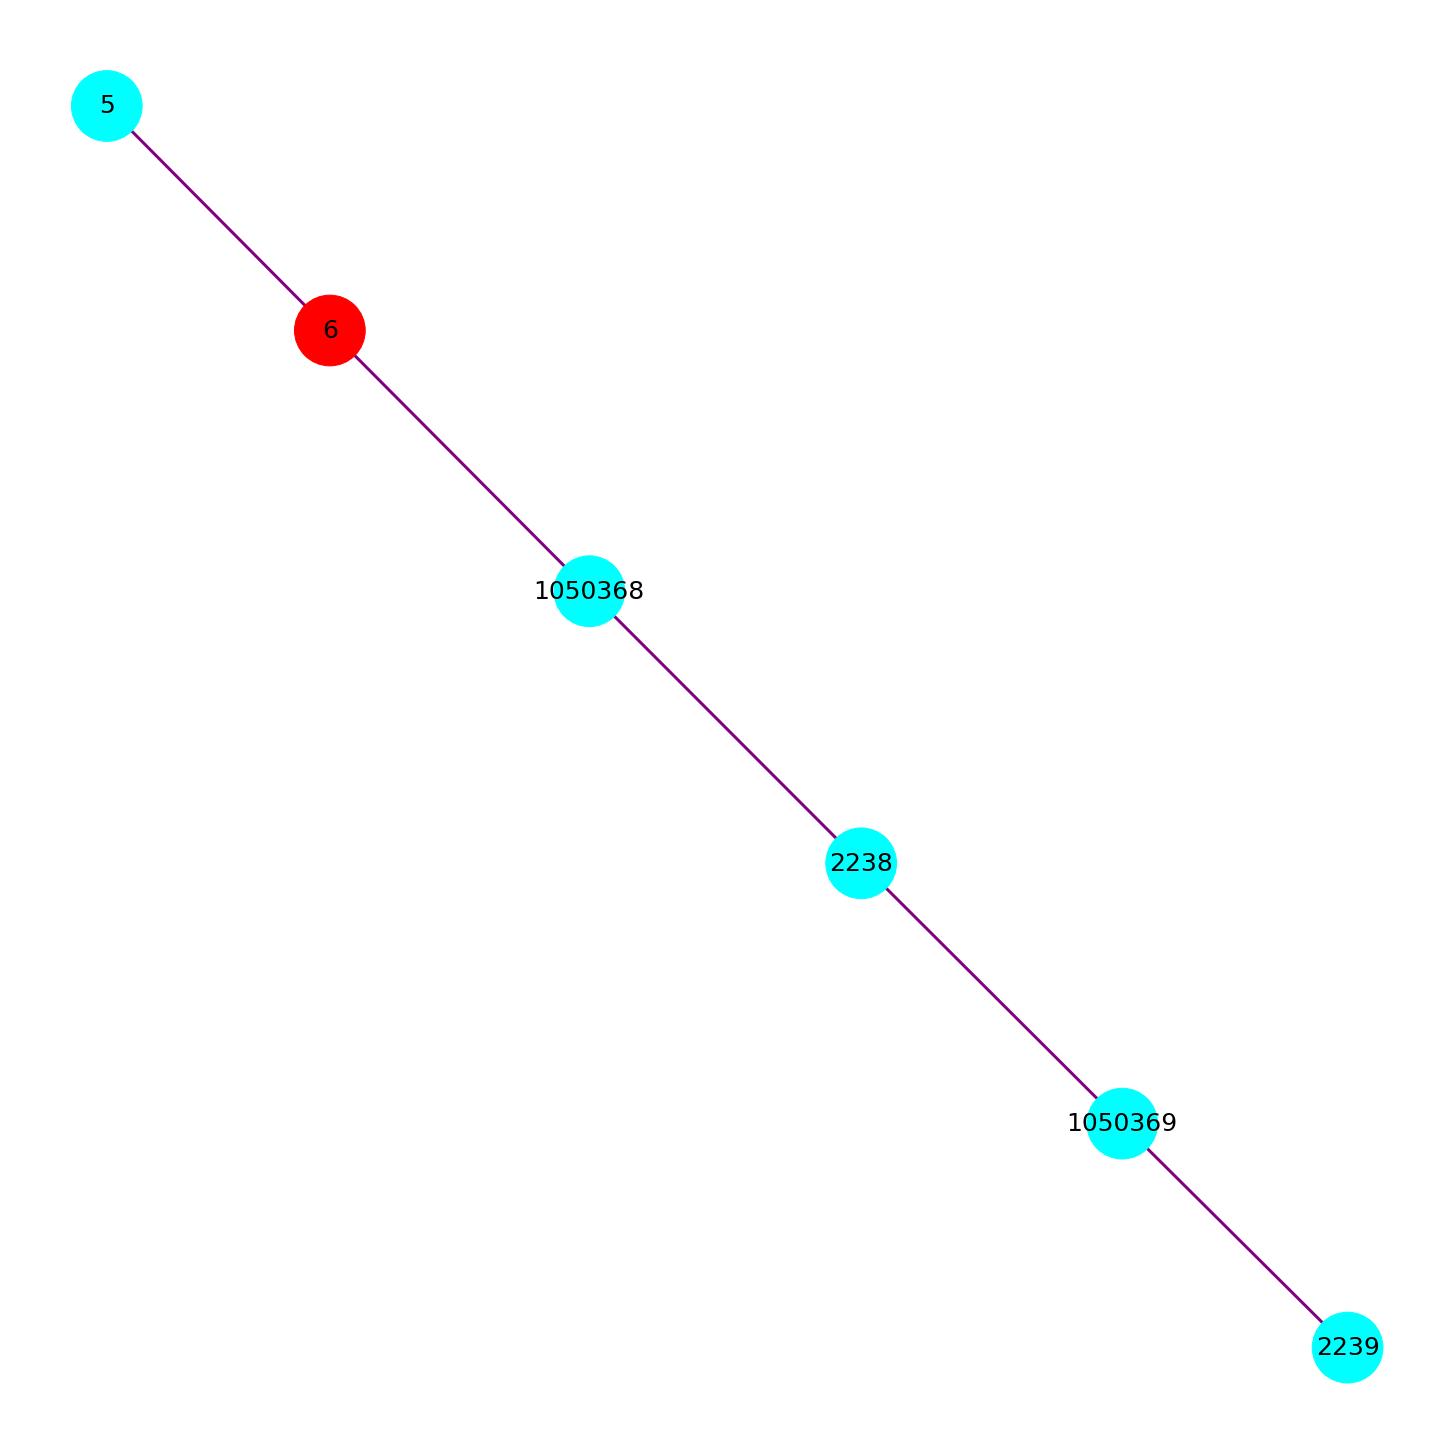

In [144]:
v=6
d=45333
nodeList=[]
typeDistance="Time"
result=getNeigh(v,nodeList,d,typeDistance)
print(result)
drawGraph(result,typeDistance)

#### Metres distance - 'Distance'

[6, 5, 2244, 1048581, 1050368, 2238, 1050369, 2237, 2229, 2239, 1050370, 2605, 2240, 1050665, 2606, 2872]


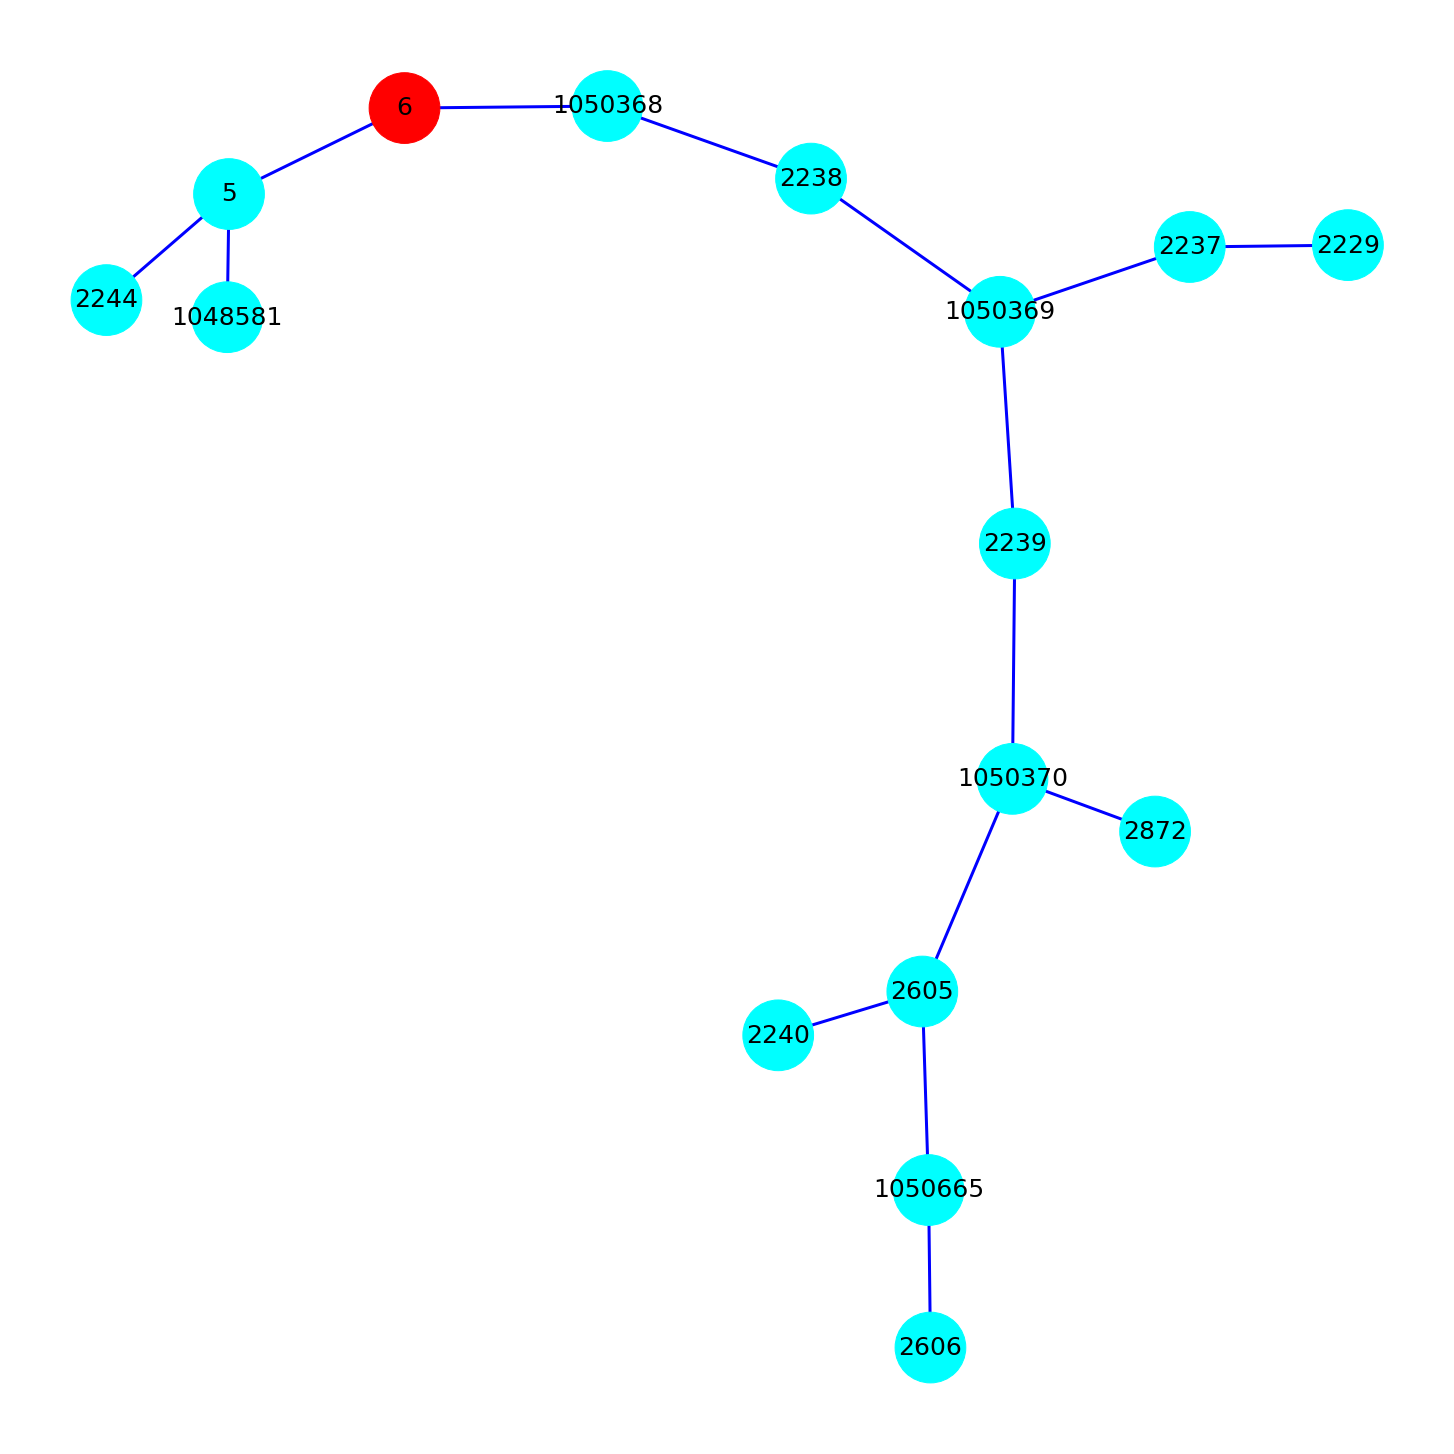

16

In [145]:
v=6
d=25000
typeDistance="Distance"
nodeList=[]
result=getNeigh(v,nodeList,d,typeDistance)
print(result)
drawGraph(result,typeDistance)
len(result)

#### Network distance (i.e. consider all edges to have weight equal to 1) - 'NetworkDistance'

[6, 5, 2244, 1050375, 2247, 2252, 1048581, 8, 1050376, 2246, 1050368, 2238, 1050369, 2237, 2229, 2239, 1050370]


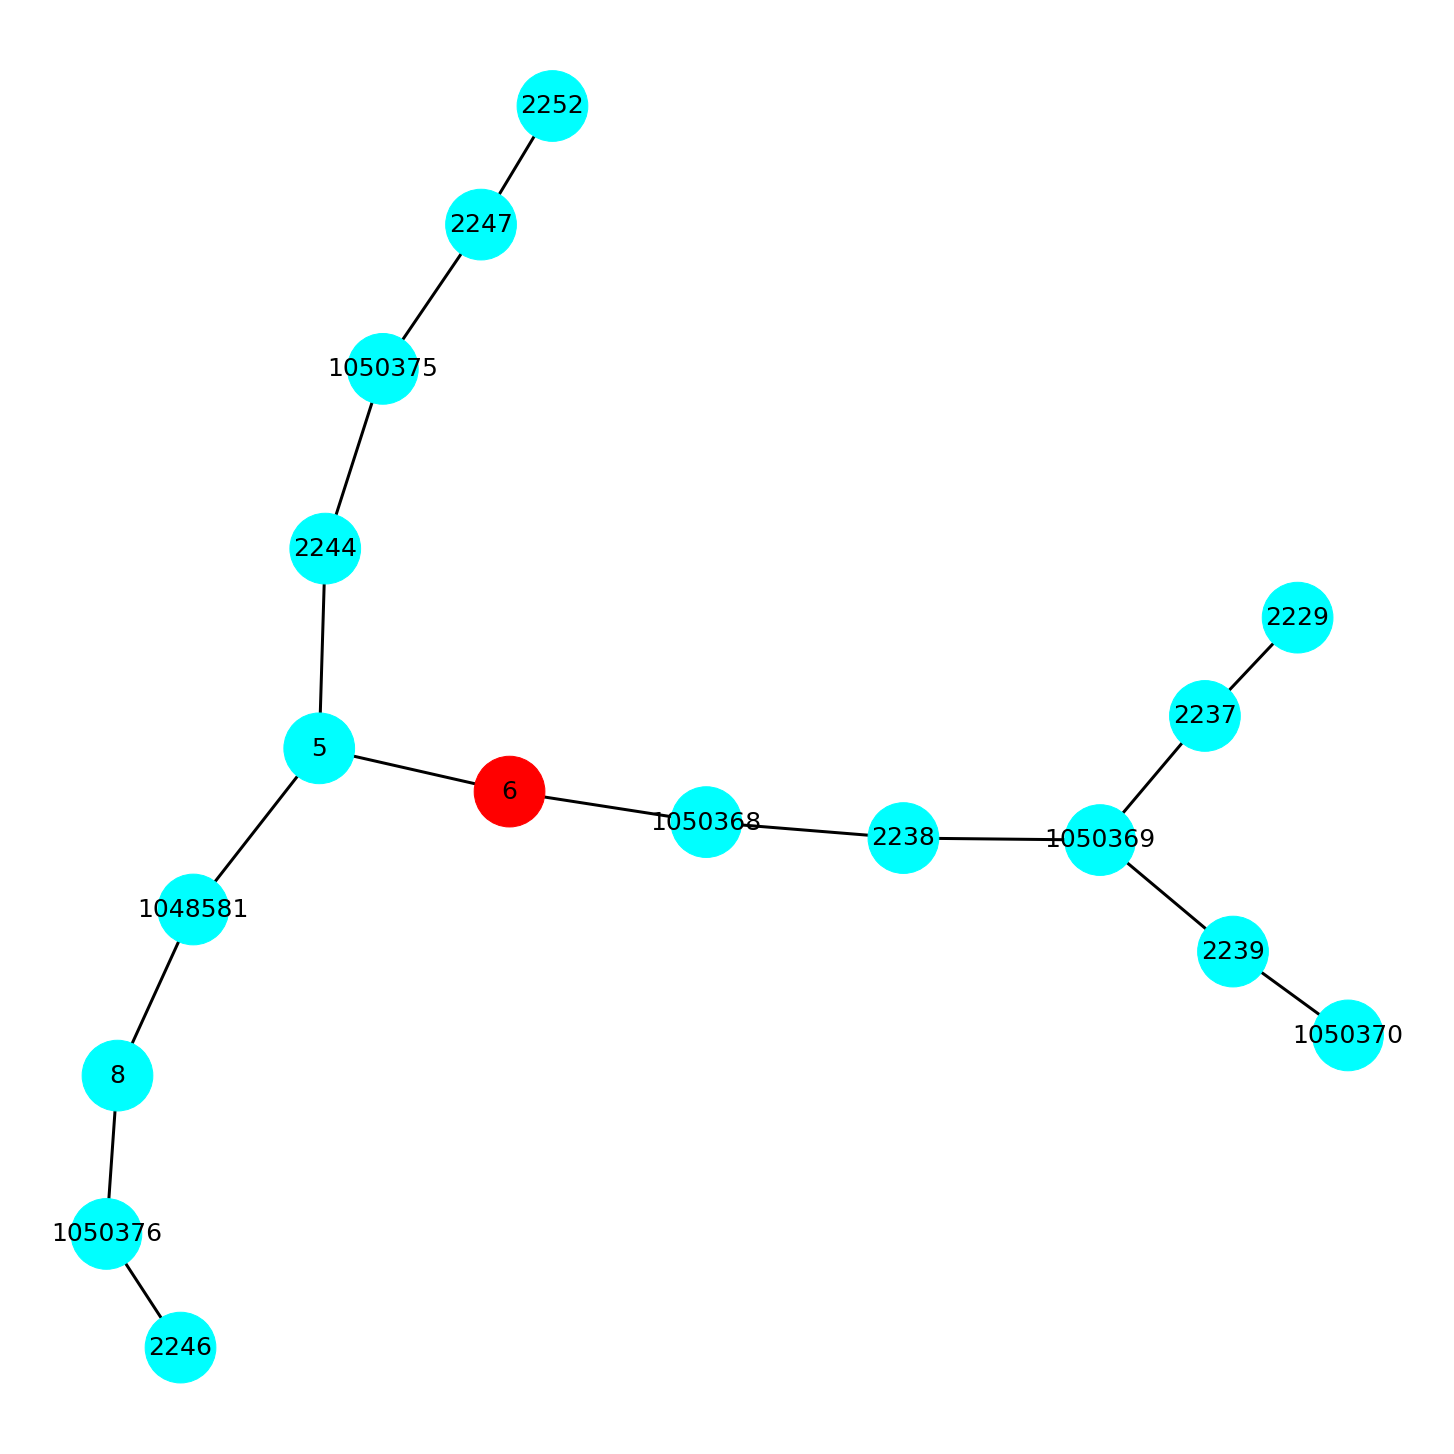

In [146]:
v=6
nodeList=[]
d=5
typeDistance="NetworkDistance"
result=getNeigh(v,nodeList,d,typeDistance)

print(result)
drawGraph(result,typeDistance)